In [1]:
# === PART 1: SETUP AND INSTALLATION (UNCHANGED) ===
import os
os.chdir('/content/')

print("✅ 1. Cloning the OFFICIAL YOLOv7 repository...")
!git clone https://github.com/WongKinYiu/yolov7.git

print("\n✅ 2. Installing compatible libraries...")
!pip install numpy matplotlib opencv-python-headless torch torchvision torchaudio Pillow pyyaml requests scipy tqdm pandas seaborn --quiet

print("\n✅ 3. Downloading official pre-trained weights...")
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt -O /content/yolov7/yolov7.pt -q

print("\n✅ 4. Applying fix for new PyTorch version...")
!sed -i "s/torch.load(weights, map_location=device)/torch.load(weights, map_location=device, weights_only=False)/" /content/yolov7/train.py
# --- We also apply the fix to the detection script up front to prevent the final error ---
!sed -i "s/ckpt = torch.load(w, map_location=map_location)/ckpt = torch.load(w, map_location=map_location, weights_only=False)/" /content/yolov7/models/experimental.py


# === PART 2: GETTING THE NEW DATA ===
print("\n⏳ 5. Please upload your NEW 'archive.zip' file (the PNEUMONIA dataset) now...")
from google.colab import files
uploaded = files.upload()

print("\n✅ 6. Unzipping the pneumonia dataset...")
zip_file_name = list(uploaded.keys())[0]
!unzip -o "{zip_file_name}" -d /content/


# === PART 3: CONFIGURATION AND TRAINING (MODIFIED FOR PNEUMONIA) ===
print("\n✅ 7. Creating the YAML file for the PNEUMONIA dataset...")
# --- MODIFICATION 1: Updated paths and class for the new dataset ---
# This dataset has a standard structure, so we point to the new unzipped folders.
yaml_content = """
train: /content/train/images
val: /content/valid/images

# The write-up says there is only one class: pneumonia
nc: 1
names: ['pneumonia']
"""
with open('/content/yolov7/pneumonia.yaml', 'w') as f:
    f.write(yaml_content)

print("\n🚀 8. STARTING THE TRAINING PROCESS FOR PNEUMONIA...")
os.chdir('/content/yolov7')

# --- MODIFICATION 2: Changed YAML file and reduced epochs to save time ---
!python train.py --weights yolov7.pt --data pneumonia.yaml --workers 1 --batch-size 4 --epochs 25 --img 640 --device 0


# === PART 4: TESTING THE NEW MODEL (MODIFIED FOR PNEUMONIA) ===
print("\n\n🎉 9. PNEUMONIA TRAINING COMPLETE!")
print("Your best model is saved in '/content/yolov7/runs/train/exp/weights/best.pt'")

print("\n🔎 10. Running detection on a sample pneumonia image...")
import glob
latest_exp_folder = sorted(glob.glob('runs/train/exp*'))[-1]
best_weights_path = os.path.join(latest_exp_folder, 'weights/best.pt')

# --- MODIFICATION 3: Path to a sample image from the new dataset ---
sample_image = glob.glob('/content/valid/images/*.jpg')[0]

!python detect.py --weights "{best_weights_path}" --source "{sample_image}"

print(f"\n✅ 11. Detection complete! Displaying result:")
from IPython.display import Image, display
latest_detect_folder = sorted(glob.glob('runs/detect/exp*'))[-1]
result_image_path = os.path.join(latest_detect_folder, os.path.basename(sample_image))
display(Image(filename=result_image_path))

✅ 1. Cloning the OFFICIAL YOLOv7 repository...
Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 19.91 MiB/s, done.
Resolving deltas: 100% (511/511), done.

✅ 2. Installing compatible libraries...

✅ 3. Downloading official pre-trained weights...

✅ 4. Applying fix for new PyTorch version...

⏳ 5. Please upload your NEW 'archive.zip' file (the PNEUMONIA dataset) now...


Streaming output truncated to the last 5000 lines.
  inflating: /content/rsna/train/labels/56eaec61-0b13-41db-ba1d-85075dbc0b7b.txt  
  inflating: /content/rsna/train/labels/56f44a88-2d8e-4910-9c41-46684fd1fdd4.txt  
  inflating: /content/rsna/train/labels/56f5bc59-c8a4-4cca-85b9-7b704532b3bd.txt  
  inflating: /content/rsna/train/labels/57006321-67ba-47a7-81b5-714bd8c3392e.txt  
  inflating: /content/rsna/train/labels/5711b0c6-2b21-4b72-b036-c1b3160cb6b4.txt  
  inflating: /content/rsna/train/labels/5735ead4-b24d-411d-8151-e3bf27f8f0a5.txt  
  inflating: /content/rsna/train/labels/573957bf-09b6-40d0-aca6-389696465e7b.txt  
  inflating: /content/rsna/train/labels/575014d8-3cea-4d15-9c5b-5b7323131fca.txt  
  inflating: /content/rsna/train/labels/5759f979-a582-4eea-8056-cc17c85bb984.txt  
  inflating: /content/rsna/train/labels/576a7e67-815c-47fd-a603-fcdab510ac78.txt  
  inflating: /content/rsna/train/labels/5774a68f-e370-4522-a1c2-cc03e2bfb3b6.txt  
  inflating: /content/rsna/train/lab

IndexError: list index out of range

In [5]:
!ls /content/rsna

test  tf_loader_format	train  val


In [8]:
import os
import glob

print("Deleting the corrupted cache file left over from the last run...")
# This is the corrupted file that is causing the crash.
cache_file_path = '/content/rsna/train.cache'
if os.path.exists(cache_file_path):
    os.remove(cache_file_path)
    print("✅ Corrupted file deleted successfully.")
else:
    print("No corrupted file to delete. Proceeding.")

print("\n🚀 Starting the correct 2-epoch training run...")

# Go to the correct directory
os.chdir('/content/yolov7')

# --- This is the training command, set to run for only 2 epochs ---
!python train.py --weights yolov7.pt --data pneumonia.yaml --workers 1 --batch-size 4 --epochs 2 --img 640 --device 0

# === This part runs the detection after the training is done ===
print("\n\n🎉 PNEUMONIA QUICK TEST COMPLETE!")
print("Your best model is saved in '/content/yolov7/runs/train/exp/weights/best.pt'")

print("\n🔎 Running detection on a sample image...")
# Find the latest training folder
latest_exp_folder = sorted(glob.glob('runs/train/exp*'))[-1]
best_weights_path = os.path.join(latest_exp_folder, 'weights/best.pt')

# Find a sample image to test
sample_image = glob.glob('/content/rsna/test/images/*.jpg')[0]

!python detect.py --weights "{best_weights_path}" --source "{sample_image}"

print(f"\n✅ Detection complete! Displaying result:")
from IPython.display import Image, display
# Find the latest detection folder
latest_detect_folder = sorted(glob.glob('runs/detect/exp*'))[-1]
result_image_path = os.path.join(latest_detect_folder, os.path.basename(sample_image))
display(Image(filename=result_image_path))

Deleting the corrupted cache file left over from the last run...
No corrupted file to delete. Proceeding.

🚀 Starting the correct 2-epoch training run...
2025-10-05 19:32:03.197315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759692723.217600    8612 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759692723.223461    8612 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759692723.238310    8612 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759692723.238335    8612 computation_placer.cc:177] computation placer already registered. Plea

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp2/2392af63-9496-4e72-b348-9276432fd797.jpg'

✅ Applying the final PyTorch compatibility fix for dataset caching...

🚀 Re-starting the final 2-epoch training run...
2025-10-05 19:34:05.093838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759692845.113252    9161 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759692845.119172    9161 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759692845.134167    9161 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759692845.134194    9161 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

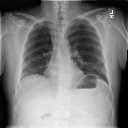

In [9]:
import os
import glob

print("✅ Applying the final PyTorch compatibility fix for dataset caching...")
# This is the new, critical fix for the datasets.py file
!sed -i "s/cache, exists = torch.load(cache_path), True/cache, exists = torch.load(cache_path, weights_only=False), True/" /content/yolov7/utils/datasets.py

print("\n🚀 Re-starting the final 2-epoch training run...")

# Go to the correct directory
os.chdir('/content/yolov7')

# This is the training command, set to run for only 2 epochs
!python train.py --weights yolov7.pt --data pneumonia.yaml --workers 1 --batch-size 4 --epochs 2 --img 640 --device 0

# === This part runs the detection after the training is done ===
print("\n\n🎉 PNEUMONIA QUICK TEST COMPLETE!")
print("Your best model is saved in '/content/yolov7/runs/train/exp/weights/best.pt'")

print("\n🔎 Running detection on a sample image...")
# Find the latest training folder
latest_exp_folder = sorted(glob.glob('runs/train/exp*'))[-1]
best_weights_path = os.path.join(latest_exp_folder, 'weights/best.pt')

# Find a sample image to test
sample_image = glob.glob('/content/rsna/test/images/*.jpg')[0]

!python detect.py --weights "{best_weights_path}" --source "{sample_image}"

print(f"\n✅ Detection complete! Displaying result:")
from IPython.display import Image, display
# Find the latest detection folder
latest_detect_folder = sorted(glob.glob('runs/detect/exp*'))[-1]
result_image_path = os.path.join(latest_detect_folder, os.path.basename(sample_image))
display(Image(filename=result_image_path))

In [10]:
!zip -r /content/pneumonia_project.zip /content/yolov7

  adding: content/yolov7/ (stored 0%)
  adding: content/yolov7/traced_model.pt (deflated 17%)
  adding: content/yolov7/deploy/ (stored 0%)
  adding: content/yolov7/deploy/triton-inference-server/ (stored 0%)
  adding: content/yolov7/deploy/triton-inference-server/render.py (deflated 73%)
  adding: content/yolov7/deploy/triton-inference-server/data/ (stored 0%)
  adding: content/yolov7/deploy/triton-inference-server/data/dog.jpg (deflated 3%)
  adding: content/yolov7/deploy/triton-inference-server/data/dog_result.jpg (deflated 1%)
  adding: content/yolov7/deploy/triton-inference-server/labels.py (deflated 52%)
  adding: content/yolov7/deploy/triton-inference-server/client.py (deflated 81%)
  adding: content/yolov7/deploy/triton-inference-server/processing.py (deflated 67%)
  adding: content/yolov7/deploy/triton-inference-server/README.md (deflated 60%)
  adding: content/yolov7/deploy/triton-inference-server/boundingbox.py (deflated 69%)
  adding: content/yolov7/data/ (stored 0%)
  addin